Compare n!, x<sup>n</sup>, n<sup>x</sup>, x<sup>x</sup>

Extension of fact_vs_x^x


In [5]:
import matplotlib.pyplot as plt
import math
from IPython.display import clear_output


Reducing iteration saves time but also makes data more inaccurate.  
Enlarge step to reduce calculation.


In [14]:
# Set functions for newton method
functions = [lambda x, n, s: x * (n * math.log(x) - s) / n,
             lambda x, n, s: x - s / (math.log(n)),
             lambda x, n, s: (x * math.log(x) - s) / (1 + math.log(x))]


In [27]:
# Init
newton_iteration = 100
step = 1000


In [29]:
# Init
x_data = [1]
y_data = [[1], [1], [1]]
s = 0
n = 1
prev_data = []


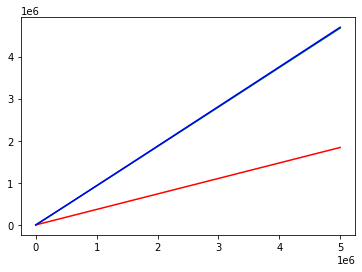

In [30]:
# Keep calculating (preserve previous data)
# Interrupt to exit


update_period = 1000


def plot(x_data, y_data):
    clear_output(wait=True)
    plt.plot(x_data, y_data[0], color="r")
    plt.plot(x_data, y_data[1], color="g")
    plt.plot(x_data, y_data[2], color="b")
    plt.show()


def newton_method(f, x, n, s):
    for i in range(newton_iteration):
        x -= f(x, n, s)
    return x


try:
    x_data, y_data, s, n = prev_data
    plot(x_data, y_data)
finally:
    prev_data = []
    while(1):
        for i in range(update_period):
            for j in range(step):
                n += 1
                s += math.log(n)

            x_data.append(n)
            
            for j, (f, x) in enumerate(zip(functions, [k[-1]for k in y_data])):
                y_data[j].append(newton_method(f, x, n, s))

            prev_data = [x_data, y_data, s, n]

        plot(x_data, y_data)


In [ ]:

# save data to file
with open("data.txt", "w") as f:
    f.write(str(prev_data))
